In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

#loading the dataset
data1 = pd.read_csv("/content/matrix1.csv")

data1

,miRNA,bladder,breast_cancer,cervical,head n neck,KIRC,KIRP,LUAD,LUSC,PRAD,STAD,THCA,UCEC
0,hsa-mir-3128,0.000000,0.000000,0.000000,0.517950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,hsa-mir-3658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,hsa-mir-217,8.155420,13.079703,1.292636,1.553849,22.170186,8.636935,11.046939,13.892229,48.364237,52.588652,179.892491,6.354620
3,hsa-mir-22,63975.514000,67989.751330,33975.331970,38610.030610,62109.621270,53628.721820,46660.234250,136844.266000,41627.489630,40988.876240,113622.248100,63806.452140
4,hsa-mir-612,0.107308,0.000000,0.430879,1.035899,0.000000,0.000000,0.000000,0.414693,0.300399,0.097027,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,hsa-mir-3908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1042,hsa-mir-384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1043,hsa-mir-3142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1044,hsa-mir-1305,0.000000,0.726650,0.000000,0.000000,0.000000,0.531504,0.000000,0.000000,0.300399,0.582162,0.210894,0.288846


In [2]:
# Calculate the correlation matrix for DataFrame 'data1' and round the correlation coefficients to two decimal places
corr_matrix1 = data1.corr().round(2)
corr_matrix1

<ipython-input-2-632e24fba738>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix1 = data1.corr().round(2)


,bladder,breast_cancer,cervical,head n neck,KIRC,KIRP,LUAD,LUSC,PRAD,STAD,THCA,UCEC
bladder,1.00,0.60,0.63,0.96,0.73,0.34,0.86,0.69,0.90,0.96,0.40,0.66
breast_cancer,0.60,1.00,0.82,0.44,0.82,0.79,0.76,0.84,0.45,0.46,0.78,0.90
cervical,0.63,0.82,1.00,0.52,0.74,0.75,0.88,0.83,0.48,0.53,0.46,0.82
head n neck,0.96,0.44,0.52,1.00,0.66,0.25,0.79,0.54,0.92,0.99,0.31,0.51
KIRC,0.73,0.82,0.74,0.66,1.00,0.73,0.78,0.73,0.76,0.69,0.76,0.83
KIRP,0.34,0.79,0.75,0.25,0.73,1.00,0.54,0.62,0.23,0.27,0.71,0.70
LUAD,0.86,0.76,0.88,0.79,0.78,0.54,1.00,0.83,0.76,0.79,0.48,0.79
LUSC,0.69,0.84,0.83,0.54,0.73,0.62,0.83,1.00,0.49,0.54,0.65,0.75
PRAD,0.90,0.45,0.48,0.92,0.76,0.23,0.76,0.49,1.00,0.93,0.38,0.59
STAD,0.96,0.46,0.53,0.99,0.69,0.27,0.79,0.54,0.93,1.00,0.36,0.55


<ipython-input-3-916279417027>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data1.corr().round(2)


Text(0.5, 1.0, 'Matrix1')

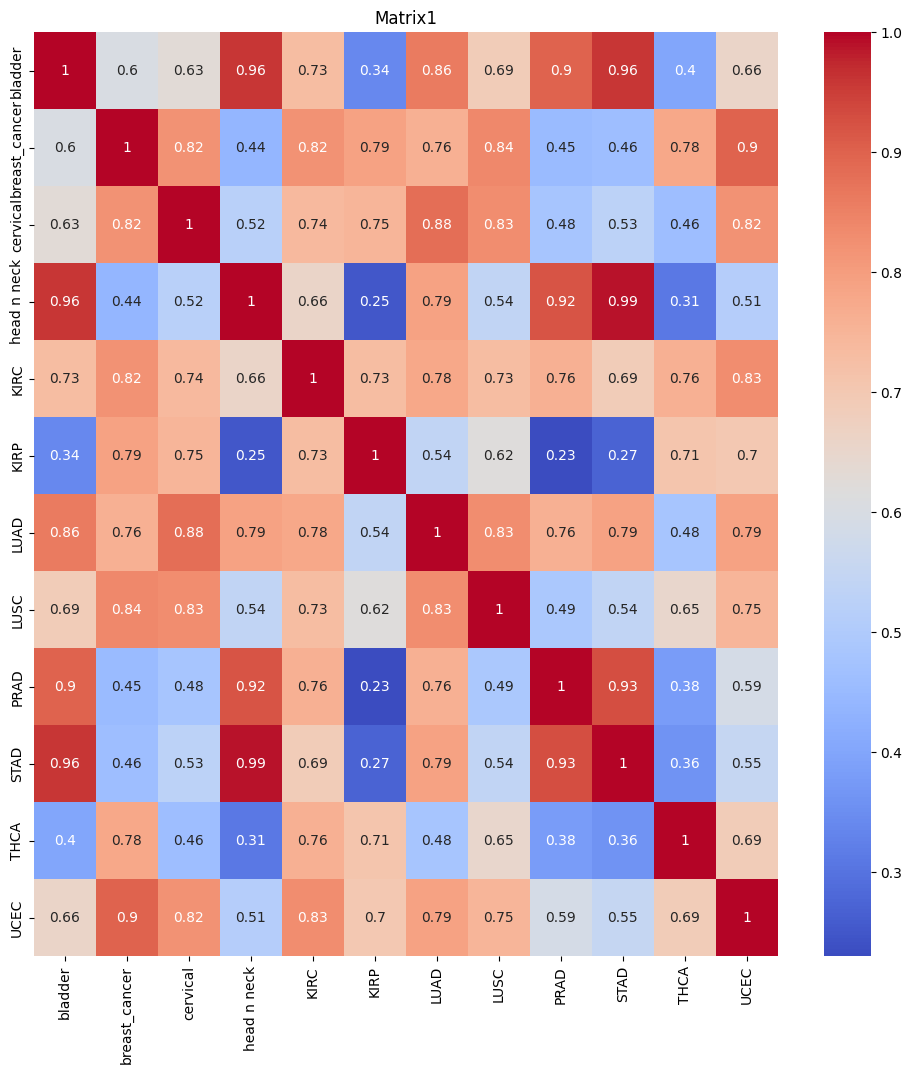

In [3]:
# Calculate the correlation matrix for DataFrame 'data1' and round the correlation coefficients to two decimal places
corr = data1.corr().round(2)

# Set the size of the figure for the heatmap plot
plt.figure(figsize= (12,12))

# Create a heatmap plot of the correlation matrix with annotations using seaborn
plot = sns.heatmap(corr, annot=True, cmap = plt.cm.coolwarm)

# Set the title of the plot
plot.set_title("Matrix1")

In [4]:
# Read the data from the CSV file "matrix2.csv" and store it in the DataFrame 'data2'
data2= pd.read_csv("/content/matrix2.csv")

data2

,miRNA,bladder,breast_cancer,cervical,head n neck,KIRC,KIRP,LUAD,LUSC,PRAD,STAD,THCA,UCEC
0,hsa-mir-3128,0.000000,0.000000,0.118438,0.000000,0.000000,0.000000,0.000000,0.298948,0.000000,0.000000,0.000000,0.000000
1,hsa-mir-3658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,hsa-mir-217,1.771178,25.559522,12.080640,7.977180,1.456229,153.204962,26.312068,13.452661,13.037025,11.906129,8.118091,12.426311
3,hsa-mir-22,11618.929610,74313.291430,79215.956960,112291.438300,63164.404340,68641.746310,36959.527810,99379.294200,18928.775010,40059.333580,38197.645880,29573.486710
4,hsa-mir-612,0.000000,0.226190,0.000000,0.000000,0.000000,0.113907,0.000000,0.000000,0.438219,0.000000,0.000000,0.037770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,hsa-mir-3908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1042,hsa-mir-384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1043,hsa-mir-3142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1044,hsa-mir-1305,0.000000,0.000000,0.000000,0.664765,0.485410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.151080


In [5]:
# Calculate the correlation matrix for DataFrame 'data2' and round the correlation coefficients to two decimal places
corr_matrix2 = data2.corr().round(2)
corr_matrix2

<ipython-input-5-3ff13cd804aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix2 = data2.corr().round(2)


,bladder,breast_cancer,cervical,head n neck,KIRC,KIRP,LUAD,LUSC,PRAD,STAD,THCA,UCEC
bladder,1.00,0.21,0.59,0.15,0.16,0.33,0.67,0.26,1.00,0.96,0.67,0.87
breast_cancer,0.21,1.00,0.86,0.93,0.87,0.37,0.85,0.95,0.28,0.32,0.83,0.33
cervical,0.59,0.86,1.00,0.89,0.74,0.29,0.98,0.90,0.65,0.63,0.91,0.63
head n neck,0.15,0.93,0.89,1.00,0.81,0.18,0.81,0.95,0.22,0.22,0.73,0.28
KIRC,0.16,0.87,0.74,0.81,1.00,0.69,0.71,0.80,0.23,0.27,0.76,0.46
KIRP,0.33,0.37,0.29,0.18,0.69,1.00,0.34,0.25,0.34,0.40,0.52,0.63
LUAD,0.67,0.85,0.98,0.81,0.71,0.34,1.00,0.86,0.72,0.72,0.96,0.68
LUSC,0.26,0.95,0.90,0.95,0.80,0.25,0.86,1.00,0.33,0.34,0.79,0.35
PRAD,1.00,0.28,0.65,0.22,0.23,0.34,0.72,0.33,1.00,0.98,0.72,0.88
STAD,0.96,0.32,0.63,0.22,0.27,0.40,0.72,0.34,0.98,1.00,0.74,0.87


<ipython-input-6-2437efff6680>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data2.corr().round(2)


Text(0.5, 1.0, 'Matrix2')

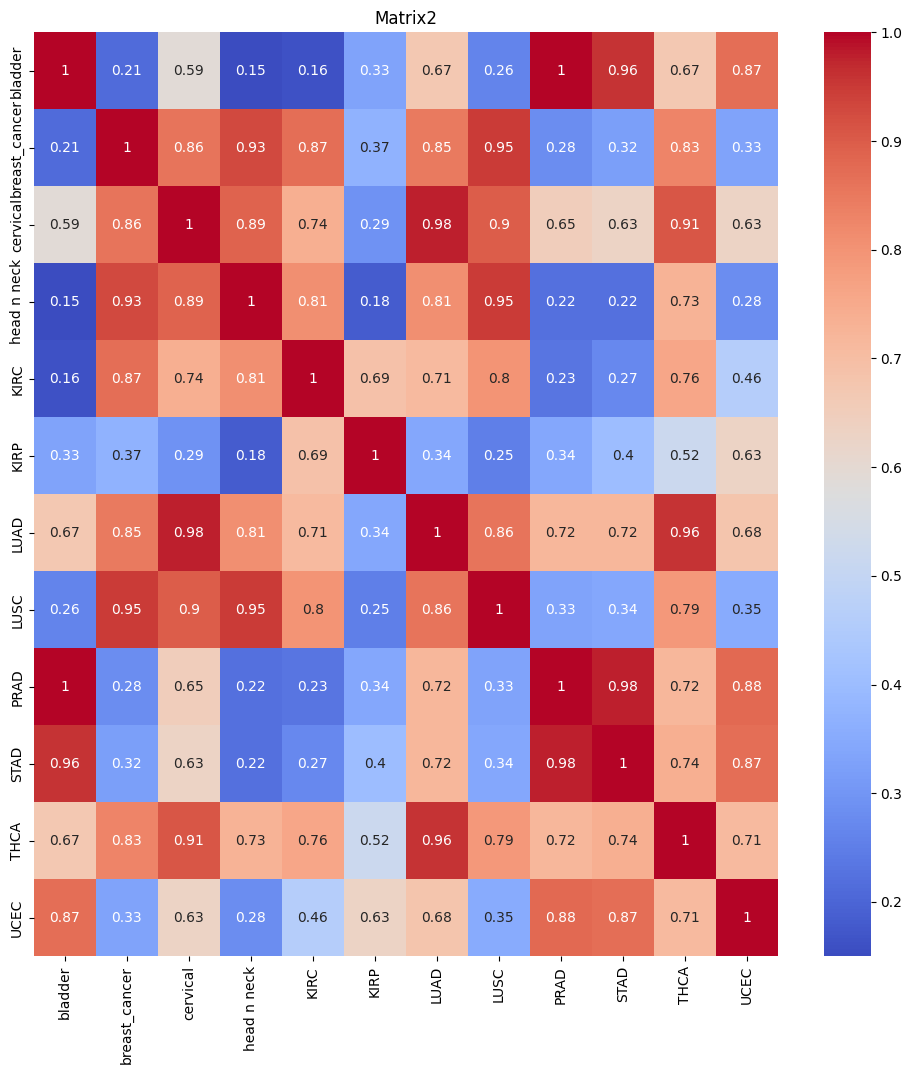

In [6]:
# Calculate the correlation matrix for DataFrame 'data2' and round the correlation coefficients to two decimal places
corr = data2.corr().round(2)

# Set the size of the figure for the heatmap plot
plt.figure(figsize= (12,12))

# Create a heatmap plot of the correlation matrix with annotations using seaborn
plot = sns.heatmap(corr, annot=True, cmap = 'coolwarm')

# Set the title of the plot
plot.set_title("Matrix2")

In [8]:
# Calculate the pairwise correlation between the columns of 'data1' and 'data2'
correlation = data1.corrwith(data2)

# Display the correlation coefficients
correlation

<ipython-input-8-a7128905e7df>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data1.corrwith(data2)


bladder          0.877022
breast_cancer    0.914114
cervical         0.891789
head n neck      0.417116
KIRC             0.899953
KIRP             0.605401
LUAD             0.967015
LUSC             0.937687
PRAD             0.915538
STAD             0.962579
THCA             0.654124
UCEC             0.540414
dtype: float64